In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import itertools

%matplotlib inline

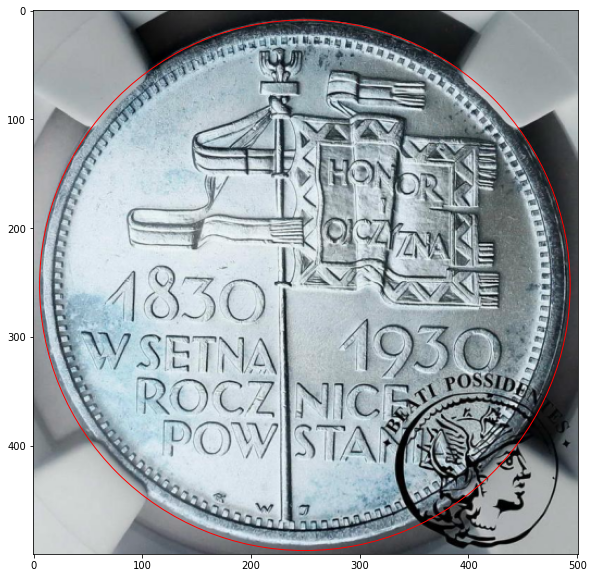

In [134]:
input_image = './339_2.jpg'
img = cv2.imread(input_image)
ratio = 500/img.shape[0] # make image approximately 500x500
img = cv2.resize(img, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
thresh = cv2.Canny(gray, 50, 100)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
circles = cv2.HoughCircles(closed, cv2.HOUGH_GRADIENT, 1, minDist=img.shape[0], param1=100, param2=0.9, minRadius=int(0.35 * img.shape[0]))

fig, ax = plt.subplots(figsize=(10,10))


circles = circles[0,:]
assert len(circles) == 1
x, y, r = circles[0]
ax.add_patch(plt.Circle((x, y),int(r), color='r', fill=False))

ax.imshow(img)
plt.show()